### Elements of structured data
    Numeric: Data that are expressed on a numeric scale.
        Continuous: Data that can take on any value in an interval. 
                    (Synonyms: interval, float,numeric)
        Discrete: Data that can take on only integer values, 
        such as counts. (Synonyms: integer,count)
    Categorical: Data that can take on only a specific set 
                 of values representing a set of possible categories. 
                 (Synonyms: enums, enumerated, factors, nominal)
        Binary: A special case of categorical data with just two categories of values, e.g.,
         0/1,true/false. (Synonyms: dichotomous, logical, indicator, boolean)
        Ordinal: Categorical data that has an explicit ordering. 
        (Synonym: ordered factor)Elements of data structure

## estimates of location
variables with measured or count data might have thousands of distinct values. A
basic step in exploring your data is getting a “typical value” for each feature (variable):
an estimate of where most of the data is located (i.e., its central tendency).

#### importing libraries

In [4]:
import pandas as pd
import numpy as np
import wquantiles
from scipy.stats import trim_mean

In [5]:
medal_count=pd.read_excel('/home/kirolos/Desktop/projects/python/practical stat/data/Medals.xlsx')
medal_count

/home/kirolos/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


### Mean is the average of the given numbers and is calculated by dividing the sum of given numbers by the total number of numbers.
 Mean = (Sum of all the observations/Total number of observations)

### $Mean = x = $ $∑ni=1 xi \over n$


In [6]:
medal_count["Total"].mean()

11.612903225806452

### weighted mean
### Weighted Mean is an average computed by giving different weights to some of the individual values. If all the weights are equal, 
### then the weighted mean is the same as the arithmetic mean. It represents the average of a given data.
### The Weighted mean is similar to the arithmetic mean or sample mean.
### $Weighted mean = xw = $ $∑ni = 1 wixi\over ∑ni = 1 wi$

In [7]:
np.average(medal_count['Gold'],weights=medal_count['Total'])

14.743518518518519

### trimmed mean
### A trimmed mean is stated as a mean trimmed by x%, where x is the sum of the percentage of observations removed from both the upper and lower bounds.

In [8]:
trim_mean(medal_count["Gold"],0.1)

1.96

### Median
### The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers). Example: The median of 4, 1, and 7 is 4 because when the numbers are put in order (1 , 4, 7) , the number 4 is in the middle.


In [9]:
medal_count['Total'].median()

4.0

### weighted median
### is an even better measure of central tendency than the plain median. It is also more “set-oriented” than the plain median. It factors in the number of times the two values in the middle subset of a table with an even number of rows appear.

In [10]:
np.average(medal_count['Total'],weights=medal_count['Gold'])
wquantiles.median(medal_count['Total'],weights=medal_count['Gold'])

39.400000000000006

### 75th percentile
### The 75th percentile is the value at which 25% of the answers lie above that value and 75% of the answers lie below that value.

In [11]:
q3=np.percentile(medal_count["Total"],75)
q3

11.0

### .describe() method gives a whole idea of what the dataset contains of mean and median etc

In [12]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of variability

### Variance
### a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set. Variance is often depicted by this symbol: σ2
### $S^2 = \frac{\sum (x_i - \bar{x})^2}{n - 1}$

In [13]:
from statistics import variance
variance(medal_count["Gold"])

49.315100514259

### Standard Deviation
### is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. The standard deviation is calculated as the square root of variance by determining each data point's deviation relative to the mean.
### $\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}$

In [14]:
from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671376

### Mean Absloute Deviation
### The mean absolute deviation of a dataset is the average distance between each data point and the mean
### $\frac {1}{n} \sum \limits_{i=1}^n |x_i-m(X)|$

In [15]:
from numpy import mean, absolute
mean(absolute(medal_count["Gold"]-mean(medal_count["Gold"])))

4.0048560527228565

### Median Absloute Deviation
###  is a robust measure of the variability of a univariate sample of quantitative data. 
### $\text{MAD}= \text{Median} (|X_i- \tilde {X}|)$


In [16]:
from numpy import median,absolute
median(absolute(medal_count["Gold"]-median(medal_count["Gold"])))

1.0

### Interquartile Range
### the interquartile range is a measure of statistical dispersion, which is the spread of the data. The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data.

In [17]:
q1,q3=np.percentile(medal_count["Gold"],[25,75])
iqr=q3-q1
iqr

3.0

## Exploring the Data Distribution

### box plots

<Axes: >

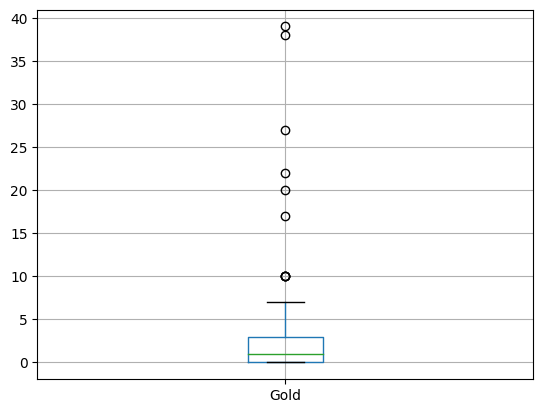

In [18]:
medal_count.boxplot(column="Gold",by=None,ax=None)

### Frequency table

In [19]:
frequency_table=medal_count.copy()
frequency_table["freq"]=pd.cut(medal_count["Gold"],10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


### Histogram

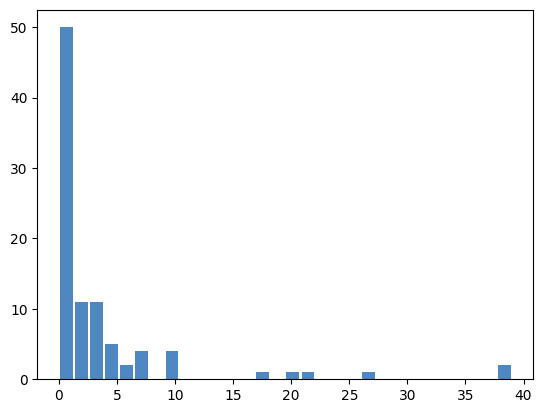

In [20]:
import matplotlib.pyplot as plt
plt.hist(x=medal_count["Gold"],bins='auto',color='#0554aa',alpha=0.7,rwidth=0.85)
plt.show()

### Density plot

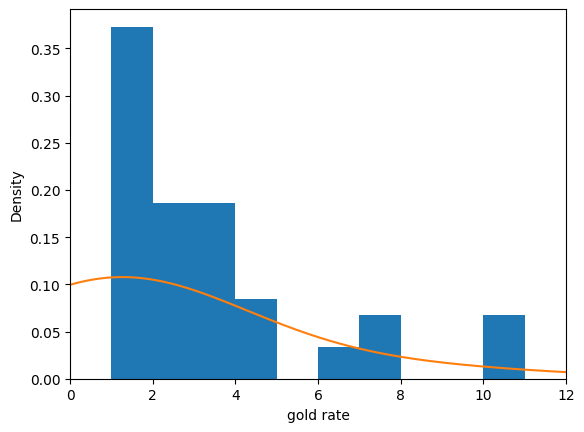

In [21]:
ax=medal_count["Gold"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)
ax.set_xlabel("gold rate")
plt.show()

## Exploring binary and categorical data

### Mode

In [22]:
medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64

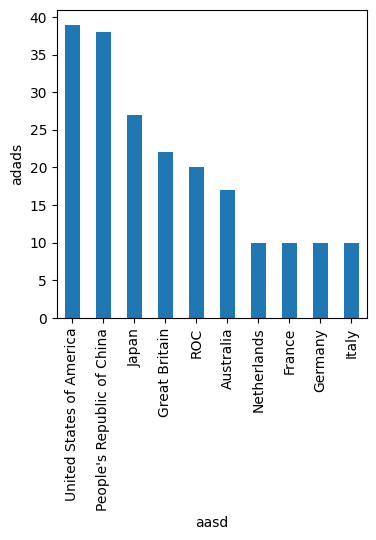

In [23]:
ax=medal_count.iloc[:10,:].plot.bar(x="Team/NOC",y="Gold",figsize=(4,4),legend=False)
ax.set_xlabel("aasd")
ax.set_ylabel("adads")
plt.show()

### pie chart

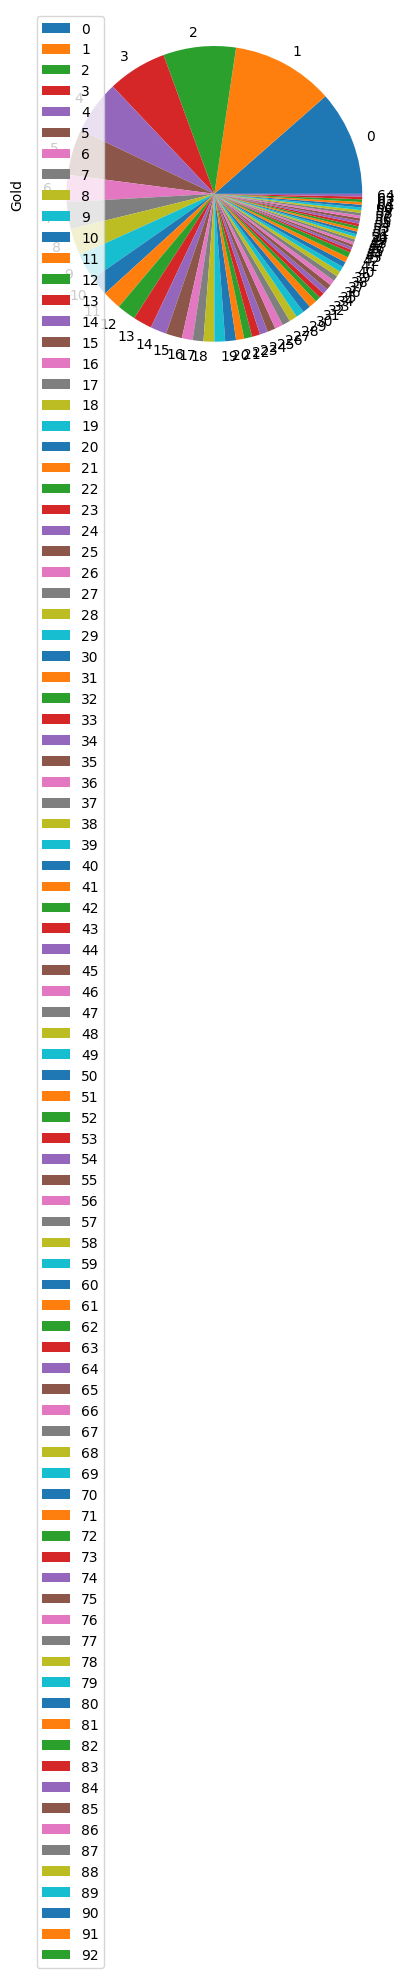

In [24]:
ax=medal_count.plot.pie(y="Gold")
plt.show()

### Correlation

In [25]:
medal_count.corr

<bound method DataFrame.corr of     Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0      1    United States of America    39      41      33    113   
1      2  People's Republic of China    38      32      18     88   
2      3                       Japan    27      14      17     58   
3      4               Great Britain    22      21      22     65   
4      5                         ROC    20      28      23     71   
..   ...                         ...   ...     ...     ...    ...   
88    86                       Ghana     0       0       1      1   
89    86                     Grenada     0       0       1      1   
90    86                      Kuwait     0       0       1      1   
91    86         Republic of Moldova     0       0       1      1   
92    86        Syrian Arab Republic     0       0       1      1   

    Rank by Total  
0               1  
1               2  
2               5  
3               4  
4               3  
..            ...  

### scatter plot

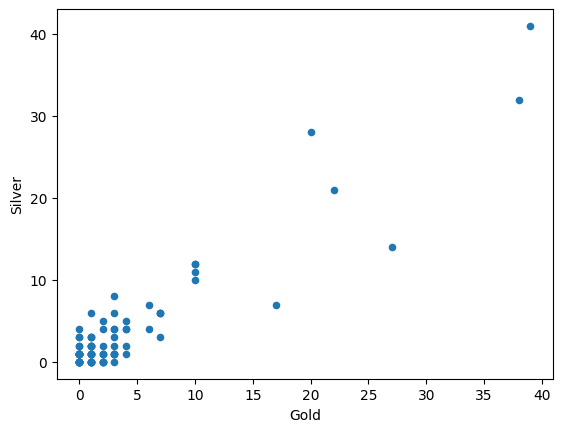

In [26]:
medal_count.plot.scatter(x="Gold",y="Silver")
plt.show()

### hexbin

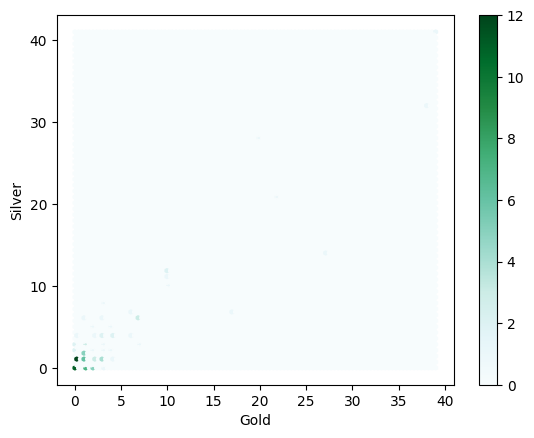

In [27]:
medal_count.plot.hexbin(x="Gold",y="Silver")
plt.show()

### contour

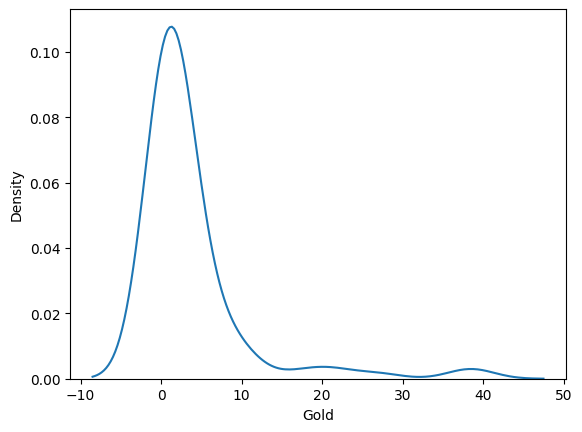

In [28]:
import seaborn as sns
ax=sns.kdeplot(medal_count["Gold"])
plt.show()

### heatmap

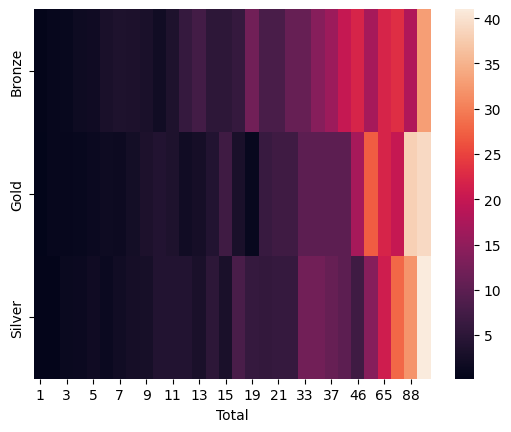

In [81]:
df_heatmap = pd.pivot_table(medal_count,columns='Total',values=["Bronze","Silver","Gold"])
sns.heatmap(df_heatmap)
plt.show()

### violin plot

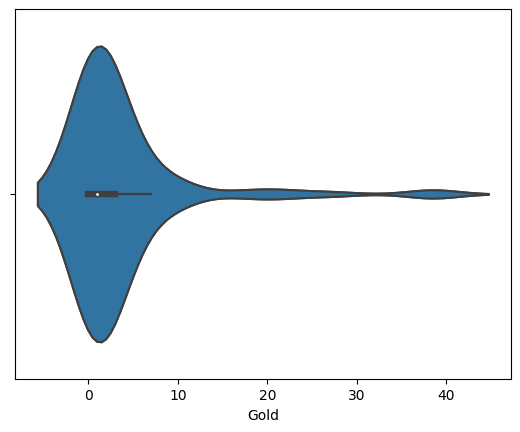

In [84]:
sns.violinplot(x=medal_count["Gold"])
plt.show()